In [2]:
%matplotlib inline
import os
import subprocess
import shlex
from PIL import Image

In [29]:
def get_map(fn):
    f = open(fn)
    qid2map = {}
    for l in f:
        ls = l.split("\t")
        if ls[0][:3] == "map":
            qid2map[ls[1]] = float(ls[2][:-1])
    return qid2map

def gnuplot(interpolation=False, testset="train_2013", mode="test", imgType="eps"):
    fn = "../baseline/run.microblog2013.QL.txt.treceval"
    map_ql = get_map(fn=fn)
    for model in ["matchpyramid", "drmm", "cdssm", "knrm", "dssm", "duet"]: #  
        if interpolation:
            fn = "../predict.inter.{}.{}.{}.treceval".format(mode, model, testset)
        else:
            fn = "../predict.{}.{}.{}.txt.treceval".format(mode, model, testset)
        map_nn = get_map(fn=fn)
        f =  open("per-query.data", "w")
        for i in range(111, 171):
            ind = str(i)
            f.write(ind + " " + str(map_nn[ind] - map_ql[ind]) + "\n")
        f.close()
        pargs = shlex.split("gnuplot -e \"model='{}'\" per-query.demo".format(model.upper()))
        print("pgnuplot -e \"output='{}.{}'\" per-query.demo".format(model.upper(), imgType))
        p = subprocess.Popen(pargs, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        pout, perr = p.communicate()
        if len(pout) != 0:
            print(pout.decode('utf-8'))
        else:
            print(perr.decode('utf-8'))
        img = Image.open("{}.{}".format(model.upper(), imgType))
        img = img.rotate(-90, expand=True)
        new_width  = 1000
        new_height = 250
        img = img.resize((new_width, new_height), Image.ANTIALIAS)
        display(img)

# NN models vs. QL baselines

pgnuplot -e "output='MATCHPYRAMID.eps'" per-query.demo



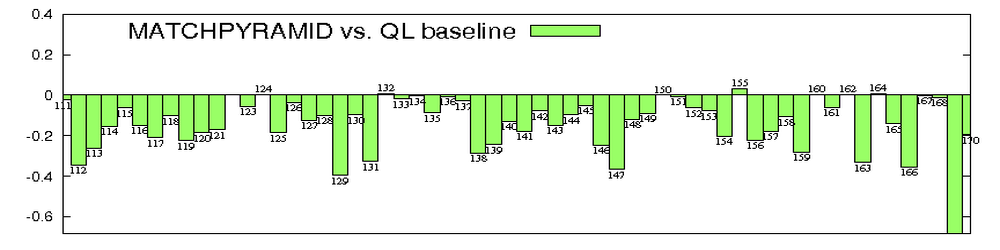

pgnuplot -e "output='DRMM.eps'" per-query.demo



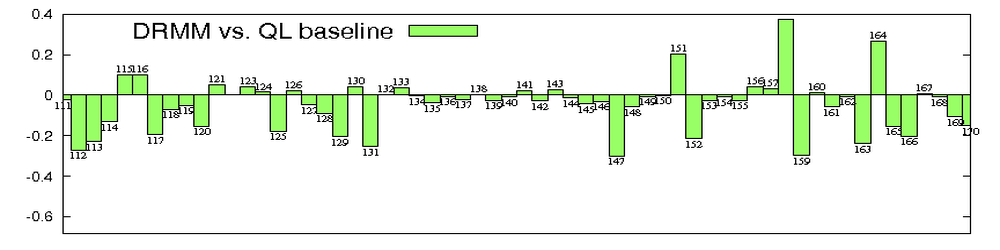

pgnuplot -e "output='CDSSM.eps'" per-query.demo



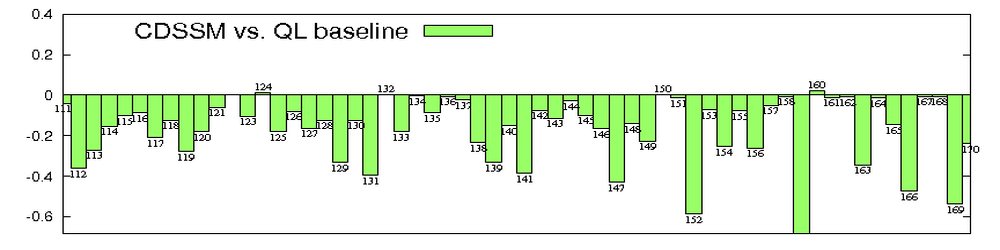

pgnuplot -e "output='KNRM.eps'" per-query.demo



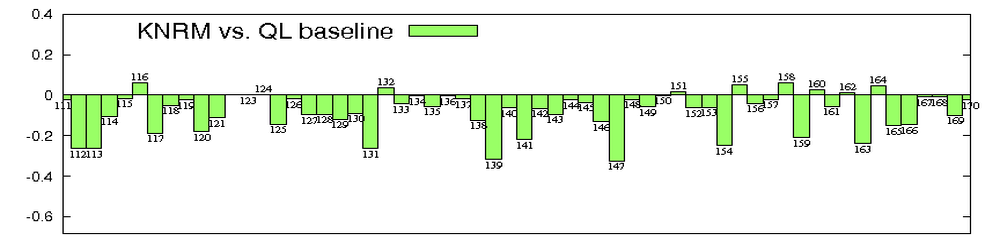

pgnuplot -e "output='DSSM.eps'" per-query.demo



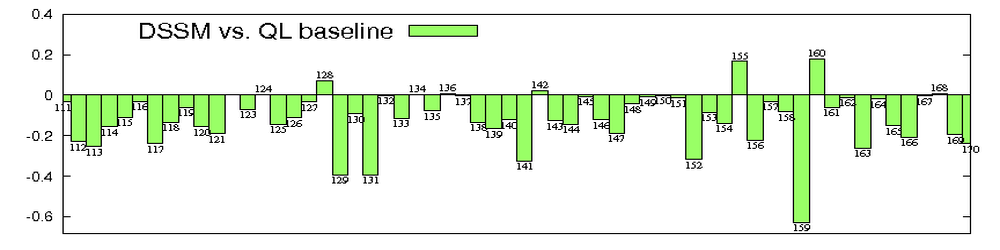

pgnuplot -e "output='DUET.eps'" per-query.demo



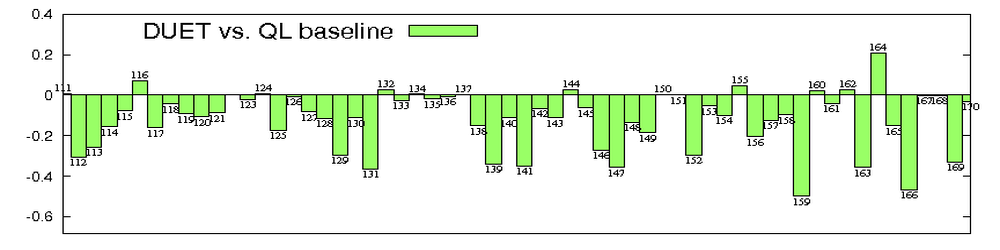

In [51]:
gnuplot(imgType="eps")

# the interpolation vs QL baseline

pgnuplot -e "output='knrm.eps'" per-query.demo



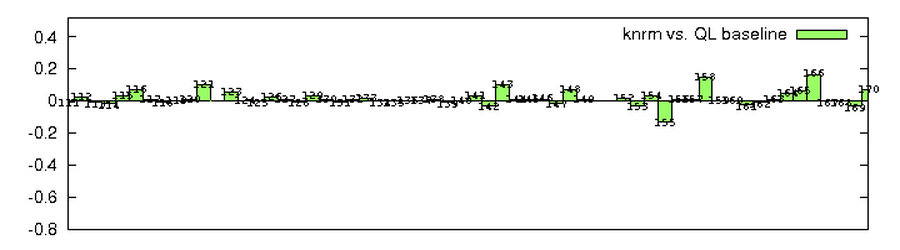

pgnuplot -e "output='matchpyramid.eps'" per-query.demo



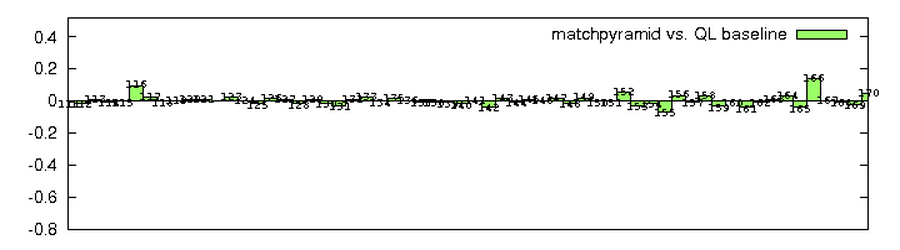

pgnuplot -e "output='drmm.eps'" per-query.demo



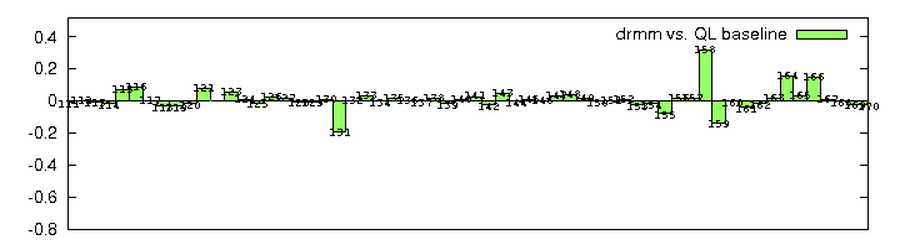

pgnuplot -e "output='cdssm.eps'" per-query.demo



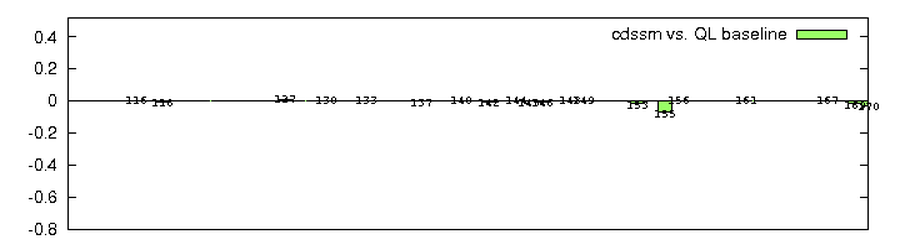

pgnuplot -e "output='dssm.eps'" per-query.demo



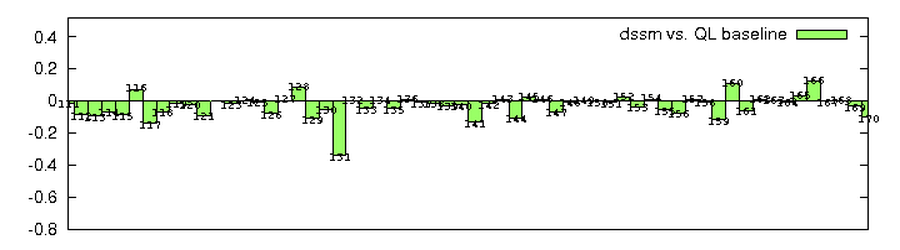

pgnuplot -e "output='duet.eps'" per-query.demo



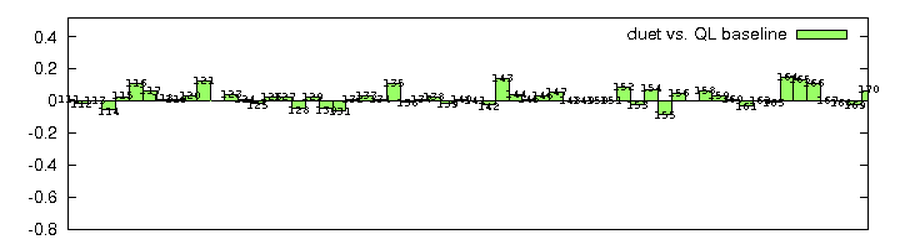

In [95]:
gnuplot(interpolation=True)